In [1]:
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba

# 文書ごとの単語単位データ
documents = []
# 全文書を1つにまとめた，単語ごとのリスト
all_words = []
# 全文書を1つにまとめた，文ごとのリスト
all_sents = []
# 全文書を1つにまとめた，単語境界のある文字列
all_word_seq = ""
# 全文書を1つにまとめた，単語境界のない文字列
all_texts = ""

# 读取数据文件
with open('toutiao_cat_data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    
documents = [' '.join(line.strip().split('_!_')[3].split()) for line in lines]

tokenized_documents = [' '.join(jieba.cut(document)) for document in documents]
for i in range(5):
    print(tokenized_documents[i])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\64403\AppData\Local\Temp\jieba.cache
Loading model cost 0.287 seconds.
Prefix dict has been built successfully.


京城 最 值得 你 来场 文化 之旅 的 博物馆
发酵 床 的 垫料 种类 有 哪些 ？ 哪 种 更好 ？
上联 ： 黄山 黄河 黄皮肤 黄土高原 。 怎么 对 下联 ？
林徽因 什么 理由 拒绝 了 徐志摩 而 选择 梁思成 为 终身伴侣 ？
黄杨木 是 什么 树 ？


In [2]:
documents = []
documents.append(" ".join(tokenized_documents).replace('\n', ''))

# さらに全データのリスト・変数にも加えておく
all_words += documents[-1].split()
all_sents += [u.replace('\n', '') for u in tokenized_documents]
all_word_seq += documents[-1]
all_texts += documents[-1].replace(' ', '')
# ファイル（文書）の数と総文数，総単語数，総文字数
print(len(documents))
print(len(all_sents))
print(len(all_words))
print(len(all_texts))
# ちなみに1文あたりの長さ（単語数）は
print(len(all_words) / len(all_sents))
# そして1単語あたりの長さ（文字数）は
print(len(all_texts) / len(all_words))

1
382688
5037561
8676943
13.163624153357304
1.722449216992112


In [3]:
# 標準ライブラリの collections モジュールに，数を数える Counter 関数がある
from collections import Counter

# 文字と単語の種類を数える（結果は辞書 dict 型のようなものである）
char_freq = Counter(all_texts)
word_freq = Counter(all_words)

# 文字と単語の種類数（異なり文字数・単語数や unique characters/words などという）
print(len(char_freq.items()))
print(len(word_freq.items()))

6018
169690


In [4]:
# 多い順に文字と単語を整列
char_freq_sorted = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# 文字の頻度上位100個を見てみる
print(char_freq_sorted[:20])


[('，', 267580), ('？', 188603), ('的', 157449), ('么', 77898), ('一', 75445), ('！', 70185), ('0', 64362), ('是', 64216), ('不', 64042), ('国', 61939), ('：', 60396), ('有', 59969), ('大', 58054), ('人', 56053), ('了', 55520), ('1', 52563), ('为', 46239), ('上', 45735), ('中', 45393), ('什', 43549)]


In [5]:
# 単語の頻度上位100個を見てみる
print(word_freq_sorted[:100])

[('，', 267580), ('？', 188603), ('的', 150717), ('！', 70185), ('：', 60396), ('了', 50236), ('是', 40195), ('你', 35956), ('“', 34985), ('”', 34898), ('吗', 30161), ('有', 30114), ('在', 26648), ('如何', 22601), ('什么', 21552), ('怎么', 20168), ('为什么', 19554), ('和', 18842), ('都', 17407), ('中国', 17050), ('》', 16557), ('《', 16546), ('被', 16408), ('对', 16034), ('不', 15898), ('人', 15423), ('、', 13982), ('会', 13724), ('我', 13421), ('看', 12626), ('年', 12450), ('这', 11749), ('美国', 10913), ('能', 10698), ('上', 10585), ('最', 10544), ('上联', 10138), ('好', 10042), ('下联', 9987), ('要', 9681), ('还', 9643), ('后', 9468), ('大', 9278), ('就', 9238), ('5', 8818), ('中', 8803), ('哪些', 8776), ('将', 8678), ('与', 8637), ('网友', 8532), ('一个', 8396), ('让', 8365), ('他', 8242), ('手机', 8085), ('月', 7883), ('谁', 7872), ('—', 7866), ('2018', 7777), ('去', 7417), ('又', 7162), ('却', 7049), ('如果', 7006), ('到', 6792), ('万', 6747), ('说', 6692), ('买', 6674), ('新', 6660), ('可以', 6602), ('多', 6588), ('也', 6566), ('世界', 6456), ('个', 6223), ('还

(0.0, 100.0)

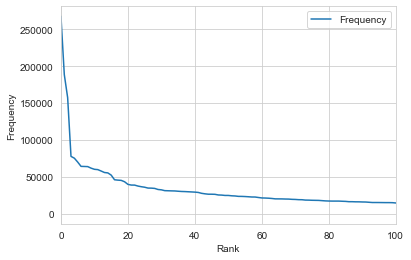

In [6]:
# プロットもしてみる
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# まず文字について
# データフレームに変換
cf = DataFrame(char_freq_sorted)
cf.columns = ["Character", "Frequency"]

# プロット
cf.plot()
plt.xlabel('Rank')
plt.ylabel('Frequency')
# わかりにくいので上位100個に制限する
plt.xlim([0,100])

(0.0, 100.0)

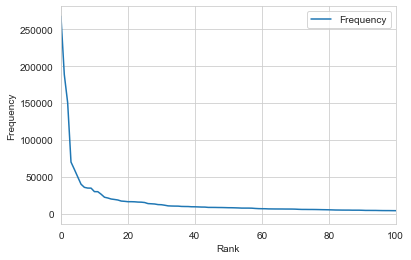

In [7]:
# 次に単語について
# データフレームに変換
wf = DataFrame(word_freq_sorted)
wf.columns = ["Word", "Frequency"]

# プロット
wf.plot()
plt.xlabel('Rank')
plt.ylabel('Frequency')
# わかりにくいので上位100個に制限する
plt.xlim([0, 100])

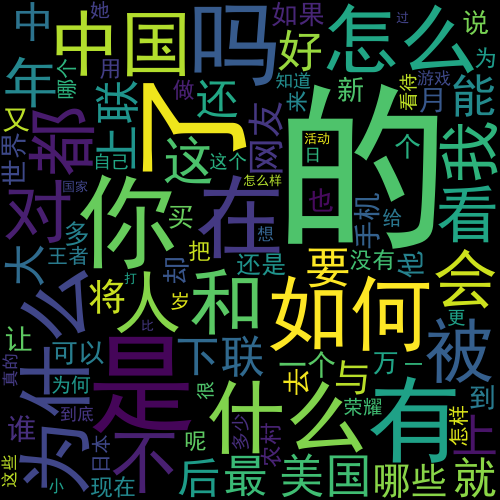

In [8]:
from wordcloud import WordCloud
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'
WordCloud(font_path = font_path,
          width = 500, height = 500,
          max_words=100,
          # テキストから作成する場合はデフォルトで2-gramも表示するので，オフにする
          collocations=False
).generate(all_word_seq).to_image()

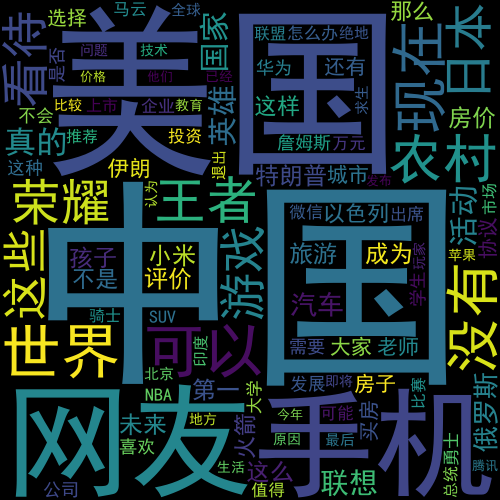

In [9]:
# 高頻度語（ここでは上位200語）をストップワードにする
high_freq_words = list(dict(word_freq_sorted[:10]).keys())
new_stopwords = ['的', '是', '在', '了', '和', '与', '及', '他', '她', '它', '我们', '你们', '自己', '这', '那','什么','为什么','如何','怎么','哪些','上联','哪个','应该','多少', '一个' ,'下联' ,'还是' ,'如果','为何' ,'怎样' ,'到底', '不能', '知道', '就是' ,'影响' ,'怎么样' ,'哪里' ,'这个']
high_freq_words.extend(new_stopwords)

WordCloud(font_path = font_path,
          width = 500, height = 500,
          max_words=100,
          collocations=False,
          # ストップワードは除外する
          stopwords = high_freq_words,
          # 単語の長さの下限（これより短い単語は除外する）
          min_word_length = 2
).generate(all_word_seq).to_image()

In [11]:
char_2grams = list(zip(all_texts[0:], all_texts[1:]))
char_3grams = list(zip(all_texts[0:], all_texts[1:], all_texts[2:]))

word_2grams = list(zip(all_words[0:], all_words[1:]))
word_3grams = list(zip(all_words[0:], all_words[1:], all_words[2:]))

# 確認
print(char_2grams[:5])
print(char_3grams[:5])
print(word_2grams[:5])
print(word_3grams[:5])


[('京', '城'), ('城', '最'), ('最', '值'), ('值', '得'), ('得', '你')]
[('京', '城', '最'), ('城', '最', '值'), ('最', '值', '得'), ('值', '得', '你'), ('得', '你', '来')]
[('京城', '最'), ('最', '值得'), ('值得', '你'), ('你', '来场'), ('来场', '文化')]
[('京城', '最', '值得'), ('最', '值得', '你'), ('值得', '你', '来场'), ('你', '来场', '文化'), ('来场', '文化', '之旅')]


In [12]:
char_2grams_freq = Counter(char_2grams)
char_3grams_freq = Counter(char_3grams)
word_2grams_freq = Counter(word_2grams)
word_3grams_freq = Counter(word_3grams)

# N-gramの種類数
print(len(char_2grams_freq.items()))
print(len(char_3grams_freq.items()))
print(len(word_2grams_freq.items()))
print(len(word_3grams_freq.items()))

790957
3132526
1731500
3182897


In [13]:
# 多い順に整列
char_2grams_freq_sorted = sorted(char_2grams_freq.items(), key=lambda x: x[1], reverse=True)
char_3grams_freq_sorted = sorted(char_3grams_freq.items(), key=lambda x: x[1], reverse=True)
word_2grams_freq_sorted = sorted(word_2grams_freq.items(), key=lambda x: x[1], reverse=True)
word_3grams_freq_sorted = sorted(word_3grams_freq.items(), key=lambda x: x[1], reverse=True)

In [14]:
# 頻度上位10個を見てみる
char_2grams_freq_sorted[0:10]

[(('什', '么'), 43321),
 (('吗', '？'), 27797),
 (('怎', '么'), 27124),
 (('如', '何'), 22611),
 (('为', '什'), 19647),
 (('中', '国'), 18650),
 (('2', '0'), 17920),
 (('0', '0'), 14415),
 (('，', '你'), 13219),
 (('美', '国'), 11749)]

In [15]:
char_3grams_freq_sorted[0:10]

[(('为', '什', '么'), 19602),
 (('2', '0', '1'), 10648),
 (('上', '联', '：'), 8210),
 (('0', '1', '8'), 8194),
 (('怎', '么', '看'), 7701),
 (('下', '联', '？'), 6800),
 (('是', '什', '么'), 6531),
 (('有', '哪', '些'), 6164),
 (('网', '友', '：'), 6134),
 (('什', '么', '？'), 6113)]

In [16]:
word_2grams_freq_sorted[0:10]

[(('吗', '？'), 27601),
 (('，', '你'), 12524),
 (('了', '，'), 8266),
 (('上联', '：'), 8208),
 (('了', '！'), 6433),
 (('下联', '？'), 6320),
 (('怎么', '看'), 6245),
 (('网友', '：'), 6133),
 (('你', '怎么'), 6048),
 (('？', '上联'), 5917)]

In [17]:
word_3grams_freq_sorted[0:10]

[(('怎么', '看', '？'), 5674),
 (('对', '下联', '？'), 5424),
 (('你', '怎么', '看'), 5310),
 (('？', '上联', '：'), 5260),
 (('，', '你', '怎么'), 4437),
 (('，', '网友', '：'), 4376),
 (('如何', '对', '下联'), 4031),
 (('，', '如何', '对'), 4008),
 (('是', '什么', '？'), 2810),
 (('怎么', '对', '？'), 2670)]

In [20]:

from itertools import combinations

# 共起的列表
co_occur = {}

# 文本中每个句子，将共现的单词进行计数
for s in all_sents:
    words = [word for word in s.split(" ") if word != '']  # 去除空字符串
    for c in combinations(words, 2):
        if c[0] in high_freq_words or c[1] in high_freq_words:
            continue
        if c in co_occur:
            co_occur[c] += 1
        else:
            co_occur[c] = 1


In [21]:
# 共起した組の総数
print(len(co_occur))

# 多い順に整列して表示（上位100個）
co_occur_sorted = sorted(co_occur.items(), key=lambda x: x[1], reverse=True)
co_occur_sorted[:100]

9125379


[(('《', '》'), 17446),
 (('、', '、'), 6534),
 (('有', '吗'), 4962),
 (('王者', '荣耀'), 4563),
 (('「', '」'), 4492),
 (('5', '月'), 4005),
 (('2018', '年'), 3913),
 (('会', '吗'), 3863),
 (('（', '）'), 3786),
 (('—', '—'), 3755),
 (('我', '我'), 3057),
 (('月', '日'), 2837),
 (('能', '吗'), 2804),
 (('5', '日'), 2568),
 (('真的', '吗'), 2439),
 (('…', '…'), 2223),
 (('有', '多'), 2177),
 (('手机', '老师'), 2059),
 (('绝地', '求生'), 2054),
 (('还', '吗'), 1923),
 (('年', '吗'), 1845),
 (('出席', '网友'), 1801),
 (('还', '能'), 1787),
 (('出席', '活动'), 1786),
 (('活动', '网友'), 1777),
 (('可以', '吗'), 1761),
 (('都', '有'), 1693),
 (('伊核', '协议'), 1652),
 (('后', '吗'), 1594),
 (('中国', '人'), 1565),
 (('退出', '协议'), 1519),
 (('让', '人'), 1490),
 (('学生', '老师'), 1467),
 (('手机', '让'), 1460),
 (('区块', '链'), 1443),
 (('学生', '手机'), 1441),
 (('人', '都'), 1430),
 (('手机', '手机'), 1414),
 (('都', '不'), 1378),
 (('手机', '家长'), 1374),
 (('老师', '赔'), 1368),
 (('老师', '事'), 1366),
 (('手机', '大家'), 1365),
 (('手机', '这种'), 1364),
 (('手机', '摔'), 1364),
 (('手机', '发票'),